Train Your Very First Pytorch Model!
Let's learn through doing.

In this notebook we will create an image classifier to detect playing cards.

We will tackle this problem in 3 parts:

Pytorch Dataset
Pytorch Model
Pytorch Training Loop
Almost every pytorch model training pipeline meets this paradigm.

In [43]:
import timm
# Models
import torch
import torch.nn as nn  # Neural Network
import torch.optim as optim  # Optimizers

# Image processing
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

# Dataloader
from torch.utils.data import Dataset, DataLoader

# Other 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Printing versions
print(f"Pytorch version: {torch.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")

Pytorch version: 2.2.2
Pandas version: 2.2.2
Numpy version: 1.26.4


In [53]:
class PlayingCardDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data = ImageFolder(data_dir, transform=transform)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

    @property
    def classes(self):
        return self.data.classes

In [96]:
# Create a Dataset Class
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# Create a Dataset Class
data = PlayingCardDataset(data_dir='data/train', transform=transform)

# Paths
train_folder = r'E:\iCloudDrive\MyProjects\PyTorchLessons\project1\data\train'
valid_folder = r'E:\iCloudDrive\MyProjects\PyTorchLessons\project1\data\valid'
test_folder = r'E:\iCloudDrive\MyProjects\PyTorchLessons\project1\data\test'

# Create a Dataset Class
train_data = PlayingCardDataset(data_dir=train_folder, transform=transform)
valid_data = PlayingCardDataset(data_dir=valid_folder, transform=transform)
test_data = PlayingCardDataset(data_dir=test_folder, transform=transform)

# Create a DataLoaders
train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
valid_dataloader = DataLoader(valid_data, batch_size=32, shuffle=False)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)

Card label : ace of clubs


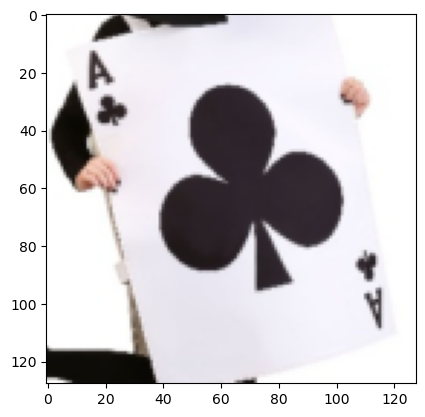

In [68]:
# Checking the data
index = 0
image, label = data[index]
print(f'Card label : {data.classes[label]}')
plt.imshow(image.permute(1, 2, 0))

In [76]:
# Creating a DataLoader
dataloader = DataLoader(data, batch_size=32, shuffle=True)

In [88]:
# Create a Model
class SimpleCardClassifier(nn.Module):
    def __init__(self, number_classes=53):
        super(SimpleCardClassifier, self).__init__()
        self.base_model = timm.create_model('efficientnet_b0', pretrained=True)
        self.features = nn.Sequential(*list(self.base_model.children())[:-1])
        
        enet_out_size = 1280
        # Make a classifier
        self.classifier = nn.Linear(enet_out_size, number_classes)
        pass

    def forward(self, x):
        x = self.features(x)
        output = self.classifier(x)
        return output

In [90]:
for images, labels in dataloader:
    break

In [89]:
model = SimpleCardClassifier()
print(model)

SimpleCardClassifier(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn1): BatchNormAct2d(
            32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
            (act): SiLU(inplace=True)
          )
          (se): SqueezeExcite(
            (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (act1): SiLU(inplace=True)
            (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (gate): Sigmoid()
          )
          (conv_pw): Conv2d(32, 16, ke

In [92]:
example_out = model(images)
example_out.shape  # [Batch_size, num_classes]

torch.Size([32, 53])

In [93]:
# Loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [94]:
criterion(example_out, labels)

tensor(4.0766, grad_fn=<NllLossBackward0>)

In [97]:
# Create a training loop
num_epochs = 5
train_loss, val_loss = [], []

# Model
model = SimpleCardClassifier(number_classes=53)